# Assessing Trends in Exiting Employee Satisfaction in the Australian Education Sector

## Introduction

In this project, we clean and analyze modified exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The original DETE and TAFE exit survey databases can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), respectively, and a short data dictionary for the most relevant columns in each survey is listed below:
- `dete_survey.csv`
    - `ID`: identification number of survey participant
    - `SeparationType`: reason for termination of employment
    - `Cease Date`: year or month of end of employment
    - `DETE Start Date`: year of start of employment
    - `Position`: position of employment
    - `Gender`: gender of employee
    - `Age`: age of employee contributing factors
- `tafe_survey.csv`
    - `Record ID`: identification number of survey participant
    - `Reason for ceasing employment`: reason for termination of employment
    - `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: length of employment in years
    - `WorkArea`: area of employment at institute
    - `Classification. Classification`: classification of current employment
    - `Gender. What is your Gender?`: gender of employee
    - `CurrentAge. Current Age`: age of employee
    
The rest of the columns in each dataset primarily contain information on employees' overall workplace (dis)satisfaction and experience and their contributing factors.

The intent of the analysis is to determine whether any patterns are visible among the exiting employees who resigned due to some kind of dissatisfaction. Particularly, we are interested in whether shorter- or longer-term employees and/or younger or older employees are more likely to resign from dissatisfaction, or if there are any other correlations among dissatisfied departing employees.

To investigate any such patterns, we combine the results of both exit surveys into a single dataset, which we then clean and analyze.

## Exploring the Exit Survey Data

We begin our analysis by exploring the two datasets containing the DETE and TAFE exit survey results, looking closely at the data column types, missing entries, unique values, etc., in order to establish a path for analysis moving forward.

In [48]:
# import pandas and NumPy libraries
import pandas as pd
import numpy as np

In [49]:
# read in the surveys
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [50]:
# print DETE dataset summary
print('DETE info: \n')
print(dete_survey.info())

DETE info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical

In [51]:
# print first few rows of DETE dataset
print('DETE entries for first few rows: \n')
print(dete_survey.head())

DETE entries for first few rows: 

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Pefor

In [52]:
# look at all unique values in each DETE column
print('DETE column unique entries: \n')
for col in dete_survey.columns:
    print(dete_survey[col].value_counts())

DETE column unique entries: 

823    1
270    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
269    1
282    1
268    1
267    1
266    1
265    1
264    1
263    1
262    1
261    1
260    1
259    1
281    1
283    1
308    1
296    1
306    1
305    1
      ..
520    1
519    1
518    1
517    1
539    1
540    1
541    1
542    1
563    1
562    1
561    1
560    1
559    1
558    1
557    1
556    1
555    1
554    1
553    1
552    1
551    1
550    1
549    1
548    1
547    1
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                      

In [53]:
# print TAFE dataset summary
print('TAFE info: \n')
print(tafe_survey.info())

TAFE info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                               

In [54]:
# print first few rows of TAFE dataset
print('TAFE entries for first few rows: \n')
print(tafe_survey.head())

TAFE entries for first few rows: 

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                        

In [55]:
# look at all unique values in each TAFE column
print('TAFE column unique entries: \n')
for col in tafe_survey.columns:
    print(tafe_survey[col].value_counts())

TAFE column unique entries: 

6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
6.343298e+17    1
6.342607e+17    1
6.345684e+17    1
6.346382e+17    1
6.345771e+17    1
6.345683e+17    1
6.349822e+17    1
6.348673e+17    1
6.348499e+17    1
6.347949e+17    1
6.344810e+17    1
6.347335e+17    1
6.343231e+17    1
6.345529e+17    1
6.345415e+17    1
6.345873e+17    1
6.346849e+17    1
6.347533e+17    1
6.347350e+17    1
6.347436e+17    1
6.348525e+17    1
6.347619e+17    1
6.345708e+17    1
6.346868e+17    1
6.345823e+17    1
               ..
6.347230e+17    1
6.345535e+17    1
6.345925e+17    1
6.345812e+17    1
6.343282e+17    1
6.341579e+17    1
6.343651e+17    1
6.348977e+17    1
6.344180e+17    1
6.345762e+17    1
6.342090e+17    1
6.349044e+17    1
6.349443e+17    1
6.349028e+17    1
6.350003e+17    1
6.348544e+17    1
6.345581e+17    1
6.344924e+17    1
6.350374e+17    1
6.346676e+17    1
6.345641e+17    1
6.345641e+17    1
6.342679e+17    

We note right away that both datasets contain a large number of columns, many of which contain missing entries and/or are unneeded for our analysis. In some cases, the missing values are represented with custom strings, i.e. `Not Stated` in `dete_survey.csv`, instead of the default `NaN` marker. Such entries will need to be modified to standardize all missing values across both datasets.

Both datasets contain several columns related to the contributing factors behind the employees' departures, which could provide insights into employee dissatisfaction leading to resignation. Multiple other columns in each dataset are related to the overall workplace experiences of the exiting employees, which also may be indicative of overall (dis)satisfaction. There are also a number of columns containing demographic information, not all of which is relevant to the analysis at hand. Many of these columns contain essentially the same information across both datasets but are named differently in each survey, which we will address when combining the datasets.

## Cleaning the Exit Survey Data

Now that we are more familiar with the contents and structures of our datasets, we can dive into the cleaning procedure. 

### Dropping Redundant Data Columns

We begin cleaning the datasets by first changing all non-standard missing value markers (`Not Stated`) to the default (`NaN`) in the DETE survey, ensuring consistency in the representation of missing entries across all columns in both datasets. The next step is then to remove from both datasets all unnecessary columns not directly relevant to our analysis.

In [56]:
# reread in the DETE survey, updating NA values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [57]:
# test NA value replacement successful
print(dete_survey['Cease Date'].value_counts(dropna=False))

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
02/2014      2
08/2012      2
04/2013      2
07/2014      2
07/2012      1
09/2014      1
2014         1
09/2010      1
07/2006      1
11/2012      1
2010         1
Name: Cease Date, dtype: int64


In [58]:
# remove extraneous columns from DETE survey
# --> print DETE columns 28-49 (answers to Likert scale questions) and their missing values
print('DETE survey columns 28-49 missing values: \n')
print(dete_survey.iloc[:,28:49].isnull().sum())
print('\n')
# --> drop columns 28-49 and save to updated DETE dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
# --> print updated DETE dataset summary
print('Updated DETE info: \n') 
print(dete_survey_updated.info())

DETE survey columns 28-49 missing values: 

Professional Development       14
Opportunities for promotion    87
Staff morale                    6
Workplace issue                34
Physical environment            5
Worklife balance                7
Stress and pressure support    12
Performance of supervisor       9
Peer support                   10
Initiative                      9
Skills                         11
Coach                          55
Career Aspirations             76
Feedback                       30
Further PD                     54
Communication                   8
My say                         10
Information                     6
Kept informed                   9
Wellness programs              56
Health & Safety                29
dtype: int64


Updated DETE info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 

In [59]:
# remove extraneous columns from TAFE survey
# --> print TAFE columns 18-66 (answers to Likert scale questions) and their missing values
print('TAFE survey columns 18-66 missing values: \n')
print(tafe_survey.iloc[:,18:66].isnull().sum())
print('\n')
# --> drop columns 18-66 and save to updated TAFE dataframe
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[18:66], axis=1)
# --> print updated DETE dataset summary
print('Updated TAFE info: \n') 
print(tafe_survey_updated.info())

TAFE survey columns 18-66 missing values: 

InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction                                                                            94
InstituteViews. Topic:2. I was given access to skills training to help me do my job better                                                                        89
InstituteViews. Topic:3. I was given adequate opportunities for personal development                                                                              92
InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%                                                               94
InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had                                                                   87
InstituteViews. Topic:6. The organisation recognised when staff did good work                                                      

Above we have removed all columns in each dataset corresponding to [Likert scale](https://en.wikipedia.org/wiki/Likert_scale) responses to various survey questions gauging the overall views and attitudes of the employees towards their respective workplaces. All of these columns contain missing entries and represent superfluos information  related to the particulars of the employees' workplace experiences. For the purposes of the analysis, we are only interested in exiting employee dissatisfaction and the general contributing factors, regarding which the remaining columns provide ample information. As such, we can safely drop the above Likert scale columns without impacting our final analysis.

### Renaming Columns

The next step in cleaning the data is to rename the columns that contain information common to both exit surveys in order to standardize the relevant column names across both datasets before we combine them. We begin by applying a standard set of vectorized string methods to all column names in both datasets to update the format to be uniform across all columns. We then rename some of the main columns in the TAFE dataset to match the column names in the DETE survey.

In [60]:
# capitalize column names, remove trailing whitespace, and replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.upper().str.strip().str.replace(' ', '_')
tafe_survey_updated.columns = tafe_survey_updated.columns.str.upper().str.strip().str.replace(' ', '_')

In [61]:
# check on our changes
print('DETE column names: \n', dete_survey_updated.columns)
print('\n')
print('TAFE column names: \n', tafe_survey_updated.columns)

DETE column names: 
 Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'ABORIGINAL', 'TORRES_STRAIT',
       'SOUTH_SEA', 'DISABILITY', 'NESB'],
      dtype='object')


TAFE column names: 
 Index(['RECORD_ID', 'INSTITUTE', 'WORKAREA', 'CESSATION_YEAR',
       'REASON_FOR_CEASING_EMPLOYMENT',
       'CONTRIBUTING_FACTORS._CAREER_MOVE_-_PUBLIC_SECTOR',
       'CONTRIBUTING_FACTORS._CAREER_MOVE_-_

In [62]:
# rename TAFE column names to match DETE
col_rename = {
    'RECORD_ID':'ID',
    'CESSATION_YEAR':'CEASE_DATE',
    'REASON_FOR_CEASING_EMPLOYMENT':'SEPARATIONTYPE',
    'GENDER._WHAT_IS_YOUR_GENDER?':'GENDER',
    'CURRENTAGE._CURRENT_AGE':'AGE',
    'EMPLOYMENT_TYPE._EMPLOYMENT_TYPE':'EMPLOYMENT_STATUS',
    'CLASSIFICATION._CLASSIFICATION':'POSITION',
    'LENGTHOFSERVICEOVERALL._OVERALL_LENGTH_OF_SERVICE_AT_INSTITUTE_(IN_YEARS)':'INSTITUTE_SERVICE',
    'LENGTHOFSERVICECURRENT._LENGTH_OF_SERVICE_AT_CURRENT_WORKPLACE_(IN_YEARS)':'ROLE_SERVICE',
}
tafe_survey_updated = tafe_survey_updated.rename(col_rename, axis=1)
# check on changes
print(tafe_survey_updated.head())

             ID                              INSTITUTE  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WORKAREA  CEASE_DATE    SEPARATIONTYPE  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  CONTRIBUTING_FACTORS._CAREER_MOVE_-_PUBLIC_SECTOR  \
0                                               NaN   
1                                                 -   
2                                                 -   
3                                                 -   
4        

### Dropping Redundant Data Rows

We can simplify the remainder of our cleaning procedure by removing further data unnecessary for our analysis. Since we are only interested in information related to employees who voluntarily left the workplace due to dissatisfaction, we can safely discard all rows from both datasets where the separation type is unrelated to resignation. Below, we see a number of unique separation types in each dataset, with three separation types related to some type of resignation in the DETE survey and a single separation type representing resignation in the TAFE survey. We can thus efficiently reduce the data by selecting only the rows with entries in the `SEPARATIONTYPE` columns containing the string `'Resignation'`.

In [63]:
# print unique values in SEPARATIONTYPE columns
print('DETE separation types: \n')
print(dete_survey_updated['SEPARATIONTYPE'].value_counts())
print('\n')
print('TAFE separation types: \n')
print(tafe_survey_updated['SEPARATIONTYPE'].value_counts())

DETE separation types: 

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SEPARATIONTYPE, dtype: int64


TAFE separation types: 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: SEPARATIONTYPE, dtype: int64


In [64]:
# copy rows where SEPARATIONTYPE entry contains 'Resignation' string
dete_resignations = dete_survey_updated[dete_survey_updated['SEPARATIONTYPE'].str.contains('Resignation', regex=False)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['SEPARATIONTYPE'] == 'Resignation'].copy()

In [65]:
# check new dataframes
print('DETE RESIGNATIONS HEADER:')
print(dete_resignations.head())
print('\n')
print('TAFE RESIGNATIONS HEADER:')
print(tafe_resignations.head())

DETE RESIGNATIONS HEADER:
    ID                        SEPARATIONTYPE CEASE_DATE  DETE_START_DATE  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    ROLE_START_DATE          POSITION CLASSIFICATION                REGION  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           BUSINESS_UNIT    EMPLOYMENT_STATUS  .

### Checking for Inconsistencies

Before we move forward with further data cleaning and manipulation, we want to check for any major logical inconsistencies in the data in order to verify the data is not corrupted in any way. If a large portion of the data does not make sense, we should abandon the analysis, but if only a small fraction of the data is problematic, we can simply remove the outliers before continuing on with the analysis.

The simplest place to look for logical inconsistencies in the data is in the start/cease date columns, since we can reasonably deduce an expected range of years within which the starting and ending dates should fall. No dates should occur after the current date or before approximately 80 years ago (assuming a maximum lifespan of 100 years and a starting working age of 20 years). We investigate these columns below.

In [66]:
# clean `CEASE_DATE` in DETE dataframe
# --> view unique values before cleaning
print('DETE cease dates (pre-cleaning): \n', dete_resignations['CEASE_DATE'].value_counts())
# --> extract year
dete_cease_years = dete_resignations['CEASE_DATE'].str.extract(r"([1-2][0-9][0-9][0-9])", expand=False)
# --> convert to float
dete_resignations['CEASE_DATE'] = dete_cease_years.astype(float)

DETE cease dates (pre-cleaning): 
 2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: CEASE_DATE, dtype: int64


In [67]:
# view unique values in date columns in ascending order
# --> check unique values in DETE `CEASE_DATE` after cleaning
print('DETE cease dates (post-cleaning):')
print(dete_resignations['CEASE_DATE'].value_counts().sort_index(), '\n')
# --> view unique values in DETE `DETE_START_DATE`
print('DETE start dates:')
print(dete_resignations['DETE_START_DATE'].value_counts().sort_index(), '\n')
# --> view unique values in TAFE `CEASE_DATE`
print('TAFE cease dates:')
print(tafe_resignations['CEASE_DATE'].value_counts().sort_index(), '\n')

DETE cease dates (post-cleaning):
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: CEASE_DATE, dtype: int64 

DETE start dates:
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: DETE_START_DATE, dtype: int64 

TAFE cease dates:
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: CEASE_DATE, dtype: int64 



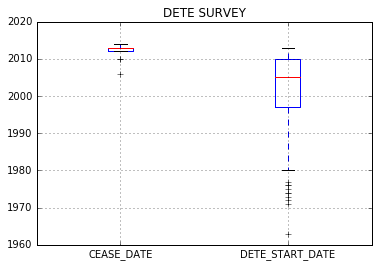

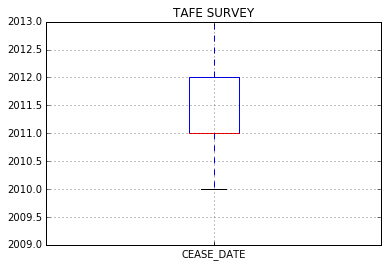

In [68]:
# plot boxplots
%matplotlib inline
import matplotlib.pyplot as plt
dete_boxplot = dete_resignations.boxplot(column=['CEASE_DATE', 'DETE_START_DATE'])
plt.title('DETE SURVEY')
plt.show()
tafe_boxplot = tafe_resignations.boxplot(column=['CEASE_DATE'])
plt.ticklabel_format(useOffset=False, axis='y')
plt.title('TAFE SURVEY')
plt.show()

We can see from both the sorted lists of unique values and the boxplots above that there are no outliers in any of the date columns in either of the datasets. Rather, all entries are well within the reasonably expected ranges of starting and ending dates, and the years data is without issue.

### Adding a Column

One of the variables we're interested in analyzing is the length of employment of dissatisfied resigning employees, as we would like to know if shorter- or longer-term employees are resigning due to some kind of dissatisfaction. To determine this, we need to know the years of service for each employee. The TAFE survey already provides this information in the `INSTITUTE_SERVICE` column, but we need to calculate this quantity ourselves and add a new corresponding column for the DETE dataset. We do so by subtracting the entries in the `DETE_START_DATE` column from those in the `CEASE_DATE` column of the DETE survey data and adding the results to a new `INSTITUTE_SERVICE` column in the DETE dataframe.

In [69]:
# add new years-of-service column to DETE survey
dete_resignations['INSTITUTE_SERVICE'] = dete_resignations['CEASE_DATE'] - dete_resignations['DETE_START_DATE']
# check contents of new column
print('unique values:')
print(dete_resignations['INSTITUTE_SERVICE'].value_counts().sort_index())
print('mean: ', dete_resignations['INSTITUTE_SERVICE'].mean())

unique values:
0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: INSTITUTE_SERVICE, dtype: int64
mean:  10.457875457875458


### Identifying Dissatisfied Employees

We next need a way to identify which resigning employees left due to some kind of dissatisfaction with the job or workplace. We can classify an employee as "dissatisfied" if they responded affirmatively to any of the survey questions related to contributing factors to their resignations, where the contributing factors specifically indicate discontent. The list of which contributing factors might constitute dissatisfaction is rather subjective, but we select all those with any explicit indication of dissatisfaction or implicit negative connotation, as listed below:

- DETE survey contributing factors:
    - `INTERPERSONAL_CONFLICTS`
    - `JOB_DISSATISFACTION`
    - `DISSATISFACTION_WITH_THE_DEPARTMENT`
    - `PHYSICAL_WORK_ENVIRONMENT`
    - `LACK_OF_RECOGNITION`
    - `LACK_OF_JOB_SECURITY`
    - `WORK_LOCATION`
    - `EMPLOYMENT_CONDITIONS`
    - `WORK_LIFE_BALANCE`
    - `WORKLOAD`
- TAFE survey contributing factors:
    - `CONTRIBUTING_FACTORS._DISSATISFACTION`
    - `CONTRIBUTING_FACTORS._JOB_DISSATISFACTION`
    - `CONTRIBUTING_FACTORS._INTERPERSONAL_CONFLICT`
    
If any of the above are indicated as contributing factors in the employee's resignation, i.e. if the entry in any of the corresponding columns is `True`, the employee is considered "dissatisfied". We can then add a new column in each dataset representing whether the employee passes this "dissatisfied" classification.

We first need to update the entries in the TAFE survey columns to boolean types. Then, we can create the new `DISSATISFIED` column in each separate dataset.

In [70]:
# view unique values in TAFE columns
print(tafe_resignations['CONTRIBUTING_FACTORS._DISSATISFACTION'].value_counts())
print(tafe_resignations['CONTRIBUTING_FACTORS._JOB_DISSATISFACTION'].value_counts())
print(tafe_resignations['CONTRIBUTING_FACTORS._INTERPERSONAL_CONFLICT'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: CONTRIBUTING_FACTORS._DISSATISFACTION, dtype: int64
-                      270
Job Dissatisfaction     62
Name: CONTRIBUTING_FACTORS._JOB_DISSATISFACTION, dtype: int64
-                         308
Interpersonal Conflict     24
Name: CONTRIBUTING_FACTORS._INTERPERSONAL_CONFLICT, dtype: int64


In [71]:
# update TAFE contributing factor values to booleans
# --> write function to change entries
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True
# --> set list of columns on which to apply changes
tafe_contrib_facts = ['CONTRIBUTING_FACTORS._DISSATISFACTION',
                      'CONTRIBUTING_FACTORS._JOB_DISSATISFACTION',
                      'CONTRIBUTING_FACTORS._INTERPERSONAL_CONFLICT']
# --> apply changes to columns
tafe_resignations[tafe_contrib_facts] = tafe_resignations[tafe_contrib_facts].applymap(update_vals)

In [72]:
# add new `DISSATISFIED` columns
# --> set list of DETE contributing factor columns
dete_contrib_facts = ['INTERPERSONAL_CONFLICTS',
                      'JOB_DISSATISFACTION',
                      'DISSATISFACTION_WITH_THE_DEPARTMENT',
                      'PHYSICAL_WORK_ENVIRONMENT',
                      'LACK_OF_RECOGNITION',
                      'LACK_OF_JOB_SECURITY',
                      'WORK_LOCATION',
                      'EMPLOYMENT_CONDITIONS',
                      'WORK_LIFE_BALANCE',
                      'WORKLOAD']
# --> add new column that's logical OR of all contributing factor columns
dete_resignations['DISSATISFIED'] = dete_resignations[dete_contrib_facts].any(axis=1, skipna=False)
tafe_resignations['DISSATISFIED'] = tafe_resignations[tafe_contrib_facts].any(axis=1, skipna=False)
# --> copy to new dataframes
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()
# --> check updates
print('DETE dissatisfaction:')
print(dete_resignations_up['DISSATISFIED'].value_counts(), '\n')
print('TAFE dissatisfaction:')
print(tafe_resignations_up['DISSATISFIED'].value_counts(), '\n')

DETE dissatisfaction:
False    157
True     154
Name: DISSATISFIED, dtype: int64 

TAFE dissatisfaction:
False    235
True      97
Name: DISSATISFIED, dtype: int64 



## Combining the Datasets

Finally, we are ready to combine our two datasets. Eventually, we want to aggregate our data according to the `INSTITUTE_SERVICE` column, since we are interested in the length of employment of dissatisfied resigning employees, so we need combine the two datasets in such a way as to ensure this type of aggregation is possible and straightforward.

### Further Column Additions and Renaming

Before combining the datasets, we must add a new `INSTITUTE` column to each dataset so we can easily discern after combination which dataset the entry originated from. We also want to rename a few more of the columns so they better align between the two datasets -- we don't want two separate columns containing the same information in our final combined dataset. After combining the datasets, we can drop further data no longer needed for analysis. Using a simple approach, we will drop any columns with less than 500 non-null values. This combination procedure is performed below.

In [73]:
# add `INSTITUTE` columns to DETE + TAFE datasets
dete_resignations_up['INSTITUTE'] = 'DETE'
tafe_resignations_up['INSTITUTE'] = 'TAFE'

In [74]:
# rename TAFE contributing factor columns (to simplify/shorten names)
tafe_resignations_up.columns = tafe_resignations_up.columns.str.replace('CONTRIBUTING_FACTORS._','CF.')
# rename columns further to tidy up and match DETE names
tafe_resignations_up.columns = tafe_resignations_up.columns.str.replace('-','TO')
tafe_cf_recol = {'CF.DISSATISFACTION':'CF.DISSATISFACTION_WITH_THE_DEPARTMENT',
                 'CF.CAREER_MOVE_TO_SELFTOEMPLOYMENT':'CF.CAREER_MOVE_TO_SELFEMPLOYMENT',
                 'MAIN_FACTOR._WHICH_OF_THESE_WAS_THE_MAIN_FACTOR_FOR_LEAVING?':'MAIN_FACTOR_FOR_LEAVING'}
tafe_resignations_up = tafe_resignations_up.rename(tafe_cf_recol, axis=1)
# check changes
print(tafe_resignations_up.columns)

Index(['ID', 'INSTITUTE', 'WORKAREA', 'CEASE_DATE', 'SEPARATIONTYPE',
       'CF.CAREER_MOVE_TO_PUBLIC_SECTOR', 'CF.CAREER_MOVE_TO_PRIVATE_SECTOR',
       'CF.CAREER_MOVE_TO_SELFEMPLOYMENT', 'CF.ILL_HEALTH',
       'CF.MATERNITY/FAMILY', 'CF.DISSATISFACTION_WITH_THE_DEPARTMENT',
       'CF.JOB_DISSATISFACTION', 'CF.INTERPERSONAL_CONFLICT', 'CF.STUDY',
       'CF.TRAVEL', 'CF.OTHER', 'CF.NONE', 'MAIN_FACTOR_FOR_LEAVING', 'GENDER',
       'AGE', 'EMPLOYMENT_STATUS', 'POSITION', 'INSTITUTE_SERVICE',
       'ROLE_SERVICE', 'DISSATISFIED'],
      dtype='object')


In [75]:
# rename DETE contributing factor columns to include 'CF.' prefix to match TAFE
# --> make list of CF columns to rename
dete_cf_cols = ['CAREER_MOVE_TO_PUBLIC_SECTOR',
                'CAREER_MOVE_TO_PRIVATE_SECTOR',
                'INTERPERSONAL_CONFLICTS',
                'JOB_DISSATISFACTION',
                'DISSATISFACTION_WITH_THE_DEPARTMENT',
                'PHYSICAL_WORK_ENVIRONMENT',
                'LACK_OF_RECOGNITION',
                'LACK_OF_JOB_SECURITY',
                'WORK_LOCATION',
                'EMPLOYMENT_CONDITIONS',
                'MATERNITY/FAMILY',
                'RELOCATION',
                'STUDY/TRAVEL',
                'ILL_HEALTH',
                'TRAUMATIC_INCIDENT',
                'WORK_LIFE_BALANCE',
                'WORKLOAD',
                'NONE_OF_THE_ABOVE']
# --> make list of updated CF columns
dete_cf_cols_up = ['CF.' + col for col in dete_cf_cols]
# --> turn lists into dictionary of keys and values
dete_cf_recols = dict(zip(dete_cf_cols, dete_cf_cols_up))
# --> rename columns with dictionary
dete_resignations_up = dete_resignations_up.rename(dete_cf_recols, axis=1)
# --> rename further columns to match TAFE names
dete_cf_recols_more = {'CF.INTERPERSONAL_CONFLICTS':'CF.INTERPERSONAL_CONFLICT',
                       'CF.NONE_OF_THE_ABOVE':'CF.OTHER'} # 'none of the above' means other, not none
dete_resignations_up = dete_resignations_up.rename(dete_cf_recols_more, axis=1)
# check changes
print(dete_resignations_up.columns)

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CF.CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CF.CAREER_MOVE_TO_PRIVATE_SECTOR', 'CF.INTERPERSONAL_CONFLICT',
       'CF.JOB_DISSATISFACTION', 'CF.DISSATISFACTION_WITH_THE_DEPARTMENT',
       'CF.PHYSICAL_WORK_ENVIRONMENT', 'CF.LACK_OF_RECOGNITION',
       'CF.LACK_OF_JOB_SECURITY', 'CF.WORK_LOCATION',
       'CF.EMPLOYMENT_CONDITIONS', 'CF.MATERNITY/FAMILY', 'CF.RELOCATION',
       'CF.STUDY/TRAVEL', 'CF.ILL_HEALTH', 'CF.TRAUMATIC_INCIDENT',
       'CF.WORK_LIFE_BALANCE', 'CF.WORKLOAD', 'CF.OTHER', 'GENDER', 'AGE',
       'ABORIGINAL', 'TORRES_STRAIT', 'SOUTH_SEA', 'DISABILITY', 'NESB',
       'INSTITUTE_SERVICE', 'DISSATISFIED', 'INSTITUTE'],
      dtype='object')


In [76]:
# combine datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
# check combined dataset
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 45 columns):
ABORIGINAL                                7 non-null object
AGE                                       596 non-null object
BUSINESS_UNIT                             32 non-null object
CEASE_DATE                                635 non-null float64
CF.CAREER_MOVE_TO_PRIVATE_SECTOR          643 non-null object
CF.CAREER_MOVE_TO_PUBLIC_SECTOR           643 non-null object
CF.CAREER_MOVE_TO_SELFEMPLOYMENT          332 non-null object
CF.DISSATISFACTION_WITH_THE_DEPARTMENT    643 non-null object
CF.EMPLOYMENT_CONDITIONS                  311 non-null object
CF.ILL_HEALTH                             643 non-null object
CF.INTERPERSONAL_CONFLICT                 643 non-null object
CF.JOB_DISSATISFACTION                    643 non-null object
CF.LACK_OF_JOB_SECURITY                   311 non-null object
CF.LACK_OF_RECOGNITION                    311 non-null object
CF.MATERNITY/FAMILY          

In [77]:
# drop columns with less than 500 non-null entries
combined_updated = combined.dropna(axis=1, thresh=500).copy()
# check updated combined dataset
print(combined_updated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 18 columns):
AGE                                       596 non-null object
CEASE_DATE                                635 non-null float64
CF.CAREER_MOVE_TO_PRIVATE_SECTOR          643 non-null object
CF.CAREER_MOVE_TO_PUBLIC_SECTOR           643 non-null object
CF.DISSATISFACTION_WITH_THE_DEPARTMENT    643 non-null object
CF.ILL_HEALTH                             643 non-null object
CF.INTERPERSONAL_CONFLICT                 643 non-null object
CF.JOB_DISSATISFACTION                    643 non-null object
CF.MATERNITY/FAMILY                       643 non-null object
CF.OTHER                                  643 non-null object
DISSATISFIED                              643 non-null object
EMPLOYMENT_STATUS                         597 non-null object
GENDER                                    592 non-null object
ID                                        651 non-null float64
INSTITUTE                

### Categorizing the Years of Service Data

Next, we need to clean up and categorize the years of service data in the `INSTITUTE_SERVICE` column. Since we are only looking for trends in the length of employment of dissatisfied resigning employees, i.e. whether those who worked at the institute for shorter or longer periods of time are more likely to resign due to dissatisfaction, we need only worry about general categories of entry values within this column, rather than every unique value. We can thus categorize the entries in this column according to the following classifications of career stages (based on [this BusinessWire article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)):
- `NEW`: less than 3 years;
- `EXPERIENCED`: 3-6 years;
- `ESTABLISHED`: 7-10 years;
- `VETERAN`: 11+ years.

We will first need to clean the data in the `INSTITUTE_SERVICE` data  to be of the same format, since the entries in the original datasets before combining them were in different formats, and extract the numerical value representing the years of service. 

Then, we can map each value to one of the categories of career stage defined above. When extracting the years of service from the various 

The different entry types consist of ranges of values, strings indicating less or more than a certain minimum or maximum length of time, and floats representing the exact number of years. When extracting the numerical years of service from the differently formatted entries, we can simply choose the first number that appears, as any range appearing in an entry is contained within one of the larger career stage categories we eventually need to map to.

In [78]:
# view unique values in `INSTITUTE_SERVICE` column
print('combined `INSTITUTE_SERVICE` entries (pre-cleaning):')
print(combined_updated['INSTITUTE_SERVICE'].value_counts(dropna=False))

combined `INSTITUTE_SERVICE` entries (pre-cleaning):
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                  

In [79]:
# extract numeric values of years of service from `INSTITUTE_SERVICE` entries
# --> convert entries to strings
combined_inst_serv = combined_updated['INSTITUTE_SERVICE'].astype('str')
# --> extract years of service
combined_inst_serv_extract = combined_inst_serv.str.extract(r'(\d+)', expand=False)
# --> convert to floats
combined_inst_serv_float = combined_inst_serv_extract.astype('float')

In [80]:
# check reformatted column -- make sure numbers coincide with those above
print('combined `INSTITUTE_SERVICE` entries (reformatted):')
print(combined_inst_serv_float.value_counts(dropna=False))

combined `INSTITUTE_SERVICE` entries (reformatted):
 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: INSTITUTE_SERVICE, dtype: int64


In [81]:
# map entries to career stage categories
# --> define function to categorize years of service into career stages
def get_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'NEW'
    elif 3 <= val < 7:
        return 'EXPERIENCED'
    elif 7 <= val < 11:
        return 'ESTABLISHED'
    elif val >= 11:
        return 'VETERAN'
# --> apply function to column
combined_updated['SERVICE_CAT'] = combined_inst_serv_float.apply(get_stage)
# --> check new column
print(combined_updated['SERVICE_CAT'].value_counts(dropna=False))

NEW            193
EXPERIENCED    172
VETERAN        136
NaN             88
ESTABLISHED     62
Name: SERVICE_CAT, dtype: int64


## Analyzing Dissatisfied Resigning Employees

We are finally able to begin our analysis of employees who resigned due to some kind of dissatisfaction.

### Dissatisfied Resigning Employees per Career Stage Category

We begin by calculating the percentage of dissatisfied resigning employees in each category of career stage. To do so, we replace any missing values in the `DISSATISFIED` column with the most common value and then calculate the mean of the column (since boolean values  `True` and `False` evaluate to `0` and `1`, respectively, so the mean here is equivalent to the percentage of `True` entries). We plot the results in a bar chart below.

In [82]:
# count number of `True`, `False`, and `NaN` values in `DISSATISFIED` column
print(combined_updated['DISSATISFIED'].value_counts(dropna=False))

False    392
True     251
NaN        8
Name: DISSATISFIED, dtype: int64


In [83]:
# replace missing values with most common value (`False`)
combined_updated = combined_updated.fillna(value={'DISSATISFIED':False})
# check updated counts
print(combined_updated['DISSATISFIED'].value_counts(dropna=False))

False    400
True     251
Name: DISSATISFIED, dtype: int64


In [87]:
# calculate percentage (mean) of dissatisfied employees in each service category
dissat_percent_cat = combined_updated.pivot_table(values='DISSATISFIED', index='SERVICE_CAT', margins=True)
# print values
print(dissat_percent_cat)

             DISSATISFIED
SERVICE_CAT              
ESTABLISHED      0.516129
EXPERIENCED      0.354651
NEW              0.321244
VETERAN          0.507353
All              0.397869


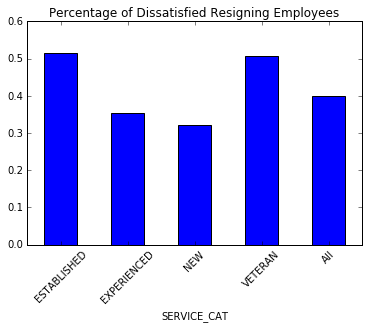

In [86]:
# make bar chart plotting results
dissat_percent_cat.plot(kind='bar', title='Percentage of Dissatisfied Resigning Employees', xlim=(0,1), legend=False, rot=45)
plt.show()

We can see from the bar chart above that new employees are the least likely to resign due to dissatisfaction (at only about 30%), while established workers are the most likely (at over 50%). Overall, of all the resigning employees, nearly 40% resigned due to some kind of dissatisfaction.

### Dissatisfied Resigning Employees per Age Category

Next, we will take a look at the age of the dissatisfied resigning employees, calculating the percentage of people in each age group who resigned due to dissatisfaction. In order to do so, we must first clean and categorize the `AGE` column in a manner analogous to that used for the `INSTITUTE_SERVICE` column. We can separate the employee ages into the following categories:
- `UNDER_26`: less than 26 years old;
- `26-35`: 26-35 years old;
- `36-45`: 36-45 years old;
- `46-55`: 46-55 years old;
- `56_PLUS`: at least 56 years old.

Based on the unique values of the entries in the age columns (listed below), we can extract categorize the entries into one of the above age groups by converting the entries to strings, extracting the first two-digit pattern from the string, and looking up the category of age group to which it belongs.

In [95]:
print(combined_updated['AGE'].value_counts())

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: AGE, dtype: int64


In [102]:
# clean age data
# --> convert entries to strings
combined_age = combined_updated['AGE'].astype('str')
# --> extract first age in listed age
combined_age_extract = combined_age.str.extract(r'(\d+)', expand=False)
# --> convert to floats
combined_age_float = combined_age_extract.astype('float')
# --> check updates
print('pre-cleaned `AGE` data:')
print(combined_age.value_counts(dropna=False))
print('\n')
print('reformatted `AGE` date:')
print(combined_age_float.value_counts(dropna=False))

pre-cleaned `AGE` data:
51-55            71
nan              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: AGE, dtype: int64


reformatted `AGE` date:
 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: AGE, dtype: int64


In [103]:
# map age entries to age group categories
# --> define function to categorize age into groups
def get_group(age):
    if pd.isnull(age):
        return np.nan
    elif age < 26:
        return 'UNDER_26'
    elif 26 <= age < 36:
        return '26-35'
    elif 36 <= age < 46:
        return '36-45'
    elif 46 <= age < 56:
        return '46-55'
    elif age >= 56:
        return '56_PLUS'
# --> apply function to column
combined_updated['AGE_GROUP'] = combined_age_float.apply(get_group)
# --> check new column
print(combined_updated['AGE_GROUP'].value_counts(dropna=False))

36-45       166
46-55       152
26-35       128
56_PLUS      78
UNDER_26     72
NaN          55
Name: AGE_GROUP, dtype: int64


In [104]:
# calculate percentage (mean) of dissatisfied employees in each age group
dissat_percent_age = combined_updated.pivot_table(values='DISSATISFIED', index='AGE_GROUP', margins=True)
# print values
print(dissat_percent_age)

           DISSATISFIED
AGE_GROUP              
26-35          0.414062
36-45          0.379518
46-55          0.427632
56_PLUS        0.423077
UNDER_26       0.305556
All            0.395973


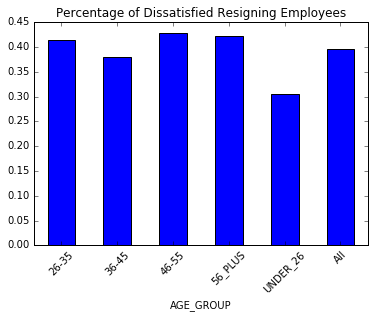

In [105]:
# make bar chart plotting results
dissat_percent_age.plot(kind='bar', title='Percentage of Dissatisfied Resigning Employees', xlim=(0,1), legend=False, rot=45)
plt.show()

Similar to the patterns observed in the percentage of dissatisfied resigning employees per career stage above, we see the employees in the youngest age group tend to be the least likely to resign due to dissatisfaction, while the older emploees more likely to be dissatisfied and resign.

## Conclusion

In this project, we explored, cleaned, combined, and analyzed two datasets of employee exit surveys in order to identify trends in age and years of service of dissatisfied resigning employees. We practiced correcting missing values, removing unnecessary data, renaming columns, verifying the quality of our data, cleaning and creating new columns, combining datasets, and aggregating data. In doing so, we determined young and new employees are the least likely to resign due to dissatisfaction, while more seasoned and older employees are moe likely to do so.